# Inciso D DEL EJERCICIO 3

In [1]:
%matplotlib inline
import pandas as pd
import skimage
print(skimage.__version__)
import numpy as np
from PIL import Image, ImageFont, ImageDraw
from PIL.ImageChops import add, subtract, multiply, difference, screen
import PIL.ImageStat as stat
from skimage.io import imread, imsave, imshow, show, imread_collection, imshow_collection
from skimage import color, viewer, exposure, img_as_float, data
from skimage.transform import SimilarityTransform, warp, swirl
from skimage.util import invert, random_noise, montage
import matplotlib.image as mpimg
import matplotlib.pylab as plt
from IPython.display import display
from scipy.ndimage import affine_transform, zoom
from scipy import misc

0.17.2


C:\ProgramData\Anaconda3\lib\site-packages\skimage\viewer\utils\__init__.py:1: UserWarning: Recommended matplotlib backend is `Agg` for full skimage.viewer functionality.
  from .core import *


(100, 100, 3)

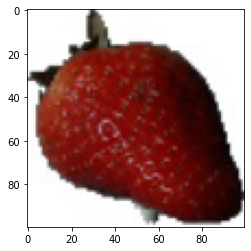

In [3]:
im = imread("C:\\Users\\Marcelo Sanchez\\Desktop\\Segundo semestre CIMAT\\Ciencia de Datos\\Tarea_3\\data_fruits_tarea\\Strawberry_r_265_100.jpg")
plt.imshow(im)
im.shape

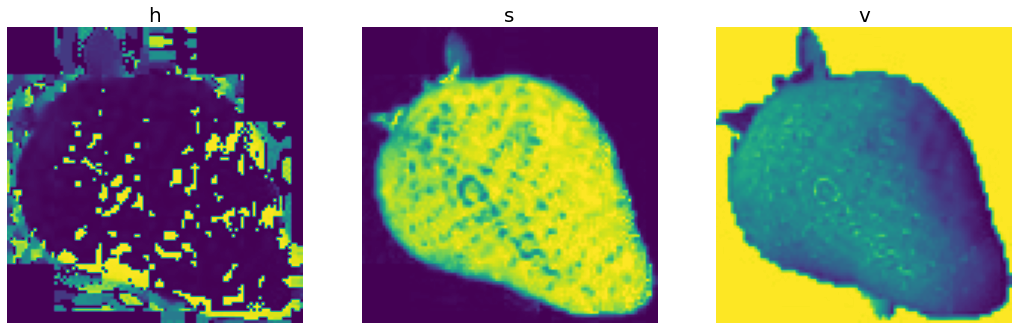

In [4]:
im_hsv = color.rgb2hsv(im)
plt.figure(figsize=(18,6))
plt.subplot(131), plt.imshow(im_hsv[...,0]), plt.title('h', size=20),
plt.axis('off')
plt.subplot(132), plt.imshow(im_hsv[...,1]), plt.title('s', size=20),
plt.axis('off')
plt.subplot(133), plt.imshow(im_hsv[...,2]), plt.title('v', size=20),
plt.axis('off')
plt.show()

In [5]:
im2 = Image.open("C:\\Users\\Marcelo Sanchez\\Desktop\\Segundo semestre CIMAT\\Ciencia de Datos\\Tarea_3\\data_fruits_tarea\\Strawberry_r_265_100.jpg").convert('HSV')
s = stat.Stat(im2)
print(s.extrema) # maximum and minimum pixel values for each channel R, G, B
print(s.count)
print(s.mean)
print(s.median)
print(s.stddev)

[(0, 254), (0, 255), (9, 255)]
[10000, 10000, 10000]
[44.5364, 123.8353, 158.4749]
[2, 170, 133]
[83.16487645057859, 108.33530252835408, 80.88137097002003]


In [89]:
im2 = Image.open("C:\\Users\\Marcelo Sanchez\\Desktop\\Segundo semestre CIMAT\\Ciencia de Datos\\Tarea_3\\data_fruits_tarea\\Strawberry_r_265_100.jpg")
s = stat.Stat(im2)
print(s.extrema) # maximum and minimum pixel values for each channel R, G, B
print(s.count)
print(s.mean)
print(s.median)
print(s.stddev)

[(9, 255), (0, 255), (0, 255)]
[10000, 10000, 10000]
[158.2195, 114.0861, 110.8753]
[133, 44, 35]
[80.66615101608605, 112.32555402396197, 114.46059911563455]


In [108]:
import os
from os.path import isfile, join

ruta = r'C:\Users\Marcelo Sanchez\Desktop\Segundo semestre CIMAT\Ciencia de Datos\Tarea_3\data_fruits_tarea'

contenido = os.listdir(ruta)

archivos = [nombre for nombre in contenido if isfile(join(ruta, nombre))]
print(archivos)


['Apple_Braeburn_100_100.jpg', 'Apple_Braeburn_101_100.jpg', 'Apple_Braeburn_104_100.jpg', 'Apple_Braeburn_107_100.jpg', 'Apple_Braeburn_108_100.jpg', 'Apple_Braeburn_112_100.jpg', 'Apple_Braeburn_118_100.jpg', 'Apple_Braeburn_119_100.jpg', 'Apple_Braeburn_128_100.jpg', 'Apple_Braeburn_131_100.jpg', 'Apple_Braeburn_137_100.jpg', 'Apple_Braeburn_140_100.jpg', 'Apple_Braeburn_142_100.jpg', 'Apple_Braeburn_143_100.jpg', 'Apple_Braeburn_152_100.jpg', 'Apple_Braeburn_155_100.jpg', 'Apple_Braeburn_156_100.jpg', 'Apple_Braeburn_15_100.jpg', 'Apple_Braeburn_161_100.jpg', 'Apple_Braeburn_164_100.jpg', 'Apple_Braeburn_173_100.jpg', 'Apple_Braeburn_182_100.jpg', 'Apple_Braeburn_18_100.jpg', 'Apple_Braeburn_190_100.jpg', 'Apple_Braeburn_193_100.jpg', 'Apple_Braeburn_195_100.jpg', 'Apple_Braeburn_197_100.jpg', 'Apple_Braeburn_200_100.jpg', 'Apple_Braeburn_202_100.jpg', 'Apple_Braeburn_21_100.jpg', 'Apple_Braeburn_223_100.jpg', 'Apple_Braeburn_227_100.jpg', 'Apple_Braeburn_231_100.jpg', 'Apple_Braeb

In [109]:
manzanas = []
for r in range(300):
    im = Image.open(join(ruta, archivos[r]))
    #im = Image.open("C:\\Users\\Marcelo Sanchez\\Desktop\\Segundo semestre CIMAT\\Ciencia de Datos\\Tarea_3\\data_fruits_tarea\\Apple_Braeburn_r_105_100.jpg") # read the image, provide the correct path
    s = stat.Stat(im)
    manzanas.append(s.median)
    #im=0

In [110]:
manzanas = []
for r in range(300):
    im = Image.open(join(ruta, archivos[r])).convert('HSV')
    s = stat.Stat(im)
    manzanas.append(s.median)

In [111]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import style

In [112]:
#creamos un primer dataframe
p1 = pd.DataFrame(manzanas)

In [113]:
x = p1.iloc[:,0:1]
y = p1.iloc[:,1:2]
z = p1.iloc[:,2:3]

<IPython.core.display.Javascript object>


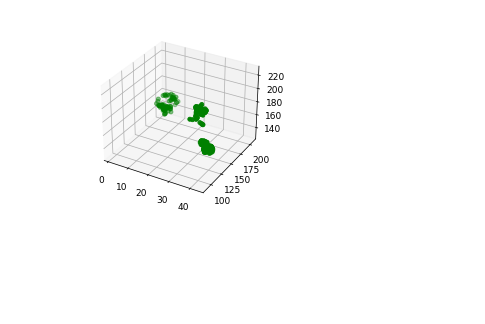

In [114]:
fig = plt.figure()
# Creamos el plano 3D
ax1 = fig.add_subplot(111, projection='3d')
ax1.scatter(x, y, z, c='g', marker='o')
plt.show()

In [115]:
#partimos de 300 y de esta nueva fruta son 100 elemntos.
albaricoche = []
for r in range(100):
    im = Image.open(join(ruta, archivos[r+300])).convert('HSV')
    #im = Image.open("C:\\Users\\Marcelo Sanchez\\Desktop\\Segundo semestre CIMAT\\Ciencia de Datos\\Tarea_3\\data_fruits_tarea\\Apple_Braeburn_r_105_100.jpg") # read the image, provide the correct path
    s = stat.Stat(im)
    albaricoche.append(s.median)
    #im=0

In [116]:
p2 = pd.DataFrame(albaricoche)

In [117]:
x2 = p2.iloc[:,0:1]
y2 = p2.iloc[:,1:2]
z2 = p2.iloc[:,2:3]

<IPython.core.display.Javascript object>


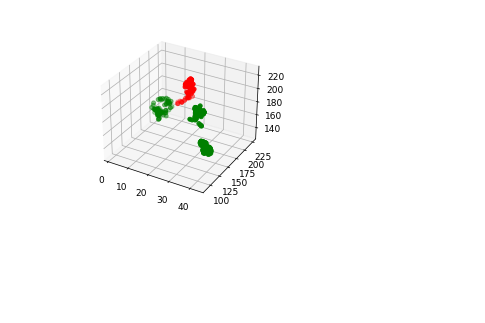

In [118]:
fig = plt.figure()
# Creamos el plano 3D
ax1 = fig.add_subplot(111, projection='3d')
ax1.scatter(x, y, z, c='g', marker='o')
ax1.scatter(x2, y2, z2, c ='r', marker='o')
plt.show()

In [119]:
aguacate = []
for r in range(100):
    im = Image.open(join(ruta, archivos[r+400])).convert('HSV')
    #im = Image.open("C:\\Users\\Marcelo Sanchez\\Desktop\\Segundo semestre CIMAT\\Ciencia de Datos\\Tarea_3\\data_fruits_tarea\\Apple_Braeburn_r_105_100.jpg") # read the image, provide the correct path
    s = stat.Stat(im)
    aguacate.append(s.median)
    #im=0

In [120]:
p3 = pd.DataFrame(aguacate)
x3 = p3.iloc[:,0:1]
y3 = p3.iloc[:,1:2]
z3 = p3.iloc[:,2:3]

In [121]:
carambula = []
for r in range(100):
    im = Image.open(join(ruta, archivos[r+500])).convert('HSV')
    #im = Image.open("C:\\Users\\Marcelo Sanchez\\Desktop\\Segundo semestre CIMAT\\Ciencia de Datos\\Tarea_3\\data_fruits_tarea\\Apple_Braeburn_r_105_100.jpg") # read the image, provide the correct path
    s = stat.Stat(im)
    carambula.append(s.median)
    #im=0
p4 = pd.DataFrame(carambula)
x4 = p4.iloc[:,0:1]
y4 = p4.iloc[:,1:2]
z4 = p4.iloc[:,2:3]

In [122]:
cereza = []
for r in range(100):
    im = Image.open(join(ruta, archivos[r+600])).convert('HSV')
    #im = Image.open("C:\\Users\\Marcelo Sanchez\\Desktop\\Segundo semestre CIMAT\\Ciencia de Datos\\Tarea_3\\data_fruits_tarea\\Apple_Braeburn_r_105_100.jpg") # read the image, provide the correct path
    s = stat.Stat(im)
    cereza.append(s.median)
    #im=0
p5 = pd.DataFrame(cereza)
x5 = p5.iloc[:,0:1]
y5 = p5.iloc[:,1:2]
z5 = p5.iloc[:,2:3]

In [123]:
mora = []
for r in range(100):
    im = Image.open(join(ruta, archivos[r+700])).convert('HSV')
    #im = Image.open("C:\\Users\\Marcelo Sanchez\\Desktop\\Segundo semestre CIMAT\\Ciencia de Datos\\Tarea_3\\data_fruits_tarea\\Apple_Braeburn_r_105_100.jpg") # read the image, provide the correct path
    s = stat.Stat(im)
    mora.append(s.median)
    #im=0
p6 = pd.DataFrame(mora)
x6 = p6.iloc[:,0:1]
y6 = p6.iloc[:,1:2]
z6 = p6.iloc[:,2:3]

In [124]:
kiwi = []
for r in range(100):
    im = Image.open(join(ruta, archivos[r+800])).convert('HSV')
    #im = Image.open("C:\\Users\\Marcelo Sanchez\\Desktop\\Segundo semestre CIMAT\\Ciencia de Datos\\Tarea_3\\data_fruits_tarea\\Apple_Braeburn_r_105_100.jpg") # read the image, provide the correct path
    s = stat.Stat(im)
    kiwi.append(s.median)
    #im=0
p7 = pd.DataFrame(kiwi)
x7 = p7.iloc[:,0:1]
y7 = p7.iloc[:,1:2]
z7 = p7.iloc[:,2:3]

In [125]:
naranja = []
for r in range(100):
    im = Image.open(join(ruta, archivos[r+900])).convert('HSV')
    #im = Image.open("C:\\Users\\Marcelo Sanchez\\Desktop\\Segundo semestre CIMAT\\Ciencia de Datos\\Tarea_3\\data_fruits_tarea\\Apple_Braeburn_r_105_100.jpg") # read the image, provide the correct path
    s = stat.Stat(im)
    naranja.append(s.median)
    #im=0
p8 = pd.DataFrame(naranja)
x8 = p8.iloc[:,0:1]
y8 = p8.iloc[:,1:2]
z8 = p8.iloc[:,2:3]

In [126]:
durazno = []
for r in range(100):
    im = Image.open(join(ruta, archivos[r+1000])).convert('HSV')
    #im = Image.open("C:\\Users\\Marcelo Sanchez\\Desktop\\Segundo semestre CIMAT\\Ciencia de Datos\\Tarea_3\\data_fruits_tarea\\Apple_Braeburn_r_105_100.jpg") # read the image, provide the correct path
    s = stat.Stat(im)
    durazno.append(s.median)
    #im=0
p9 = pd.DataFrame(durazno)
x9 = p9.iloc[:,0:1]
y9 = p9.iloc[:,1:2]
z9 = p9.iloc[:,2:3]

In [127]:
piña = []
for r in range(100):
    im = Image.open(join(ruta, archivos[r+1100])).convert('HSV')
    #im = Image.open("C:\\Users\\Marcelo Sanchez\\Desktop\\Segundo semestre CIMAT\\Ciencia de Datos\\Tarea_3\\data_fruits_tarea\\Apple_Braeburn_r_105_100.jpg") # read the image, provide the correct path
    s = stat.Stat(im)
    piña.append(s.median)
    #im=0
p10 = pd.DataFrame(piña)
x10 = p10.iloc[:,0:1]
y10 = p10.iloc[:,1:2]
z10 = p10.iloc[:,2:3]

In [128]:
fresa = []
for r in range(100):
    im = Image.open(join(ruta, archivos[r+1200])).convert('HSV')
    #im = Image.open("C:\\Users\\Marcelo Sanchez\\Desktop\\Segundo semestre CIMAT\\Ciencia de Datos\\Tarea_3\\data_fruits_tarea\\Apple_Braeburn_r_105_100.jpg") # read the image, provide the correct path
    s = stat.Stat(im)
    fresa.append(s.median)
    #im=0
p11 = pd.DataFrame(fresa)
x11 = p11.iloc[:,0:1]
y11 = p11.iloc[:,1:2]
z11 = p11.iloc[:,2:3]

<IPython.core.display.Javascript object>


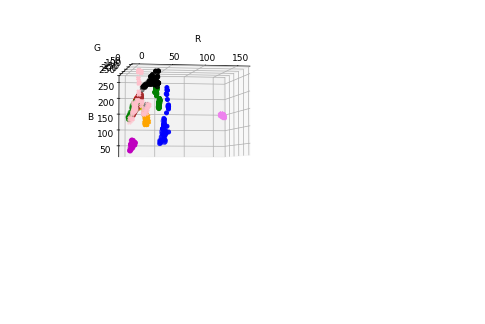

In [129]:
fig = plt.figure()
# Creamos el plano 3D
ax1 = fig.add_subplot(111, projection='3d')

# Agregamos los puntos en el plano 3D
ax1.scatter(x, y, z, c='g', marker='o')
ax1.scatter(x2, y2, z2, c ='r', marker='o')
ax1.scatter(x3, y3, z3, c ='b', marker='o')
ax1.scatter(x4, y4, z4, c ='k', marker='o')
ax1.scatter(x5, y5, z5, c ='m', marker='o')
ax1.scatter(x6, y6, z6, c ='violet', marker='X')
ax1.scatter(x7, y7, z7, c ='gray', marker='X')
ax1.scatter(x8, y8, z8, c ='y', marker='X')
ax1.scatter(x9, y9, z9, c ='brown', marker='X')
ax1.scatter(x10, y10, z10, c ='orange', marker='X')
ax1.scatter(x11, y11, z11, c ='pink', marker='X')

ax1.set_xlabel('R')
ax1.set_ylabel('G')
ax1.set_zlabel('B')
# Mostramos el gráfico
plt.show()
 

Realizamos un poco de movimiento de los datos para encontrar algunos patrones

<IPython.core.display.Javascript object>


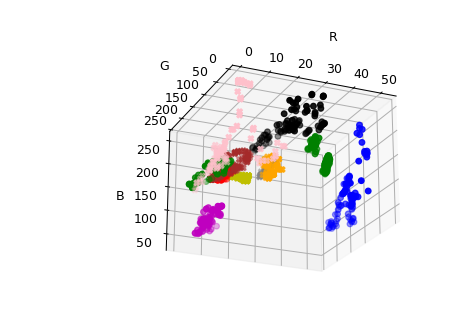

In [131]:
from mpl_toolkits.mplot3d import axes3d    

%matplotlib notebook
fig = plt.figure()
# Creamos el plano 3D
ax1 = fig.add_subplot(111, projection='3d')

# Agregamos los puntos en el plano 3D
ax1.scatter(x, y, z, c='g', marker='o')
ax1.scatter(x2, y2, z2, c ='r', marker='o')
ax1.scatter(x3, y3, z3, c ='b', marker='o')
ax1.scatter(x4, y4, z4, c ='k', marker='o')
ax1.scatter(x5, y5, z5, c ='m', marker='o')
#ax1.scatter(x6, y6, z6, c ='violet', marker='X')
ax1.scatter(x7, y7, z7, c ='gray', marker='X')
ax1.scatter(x8, y8, z8, c ='y', marker='X')
ax1.scatter(x9, y9, z9, c ='brown', marker='X')
ax1.scatter(x10, y10, z10, c ='orange', marker='X')
ax1.scatter(x11, y11, z11, c ='pink', marker='X')

ax1.set_xlabel('R')
ax1.set_ylabel('G')
ax1.set_zlabel('B')
# Mostramos el gráfico
plt.show()

# Inciso B

In [54]:
from sklearn.datasets import load_digits 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
import os

In [55]:
#datos_pca = pd.DataFrame(p3,p2)
datos_pca = []
for r in range(1300):
    im = Image.open(join(ruta, archivos[r])).convert('HSV')
    s = stat.Stat(im)
    datos_pca.append(s.median)

In [56]:
#A2 = pd.DataFrame(datos_pca)
#A2.to_csv('datos_hsv.csv')

In [57]:
scaler = StandardScaler(with_mean=True,with_std=True)
estandar = scaler.fit_transform(datos_pca)

In [58]:
pca_f=PCA(3)
data_proj = pca_f.fit_transform(estandar)
#volvemos nuestros datos en un dataframe
tabla_1 = pd.DataFrame(data_proj)

In [59]:
nombres_pca = []
for i in range(1300):
    if (i < 300):
        nombres_pca.append('manzanas')
    elif(300<= i < 400):
        nombres_pca.append('albaricoche')
    elif(400<= i < 500):
        nombres_pca.append('aguacate')
    elif(500<= i < 600):
        nombres_pca.append('carambola')
    elif(600<= i < 700):
        nombres_pca.append('cereza')
    elif(700<= i < 800):
        nombres_pca.append('arandano')
    elif(800<= i < 900):
        nombres_pca.append('kiwi')
    elif(900<= i < 1000):
        nombres_pca.append('naranja')
    elif(1000<= i < 1100):
        nombres_pca.append('durazno')
    elif(1100<= i < 1200):
        nombres_pca.append('piña')
    elif(1200<= i < 1300):
        nombres_pca.append('fresa')

In [60]:
proy_1 = tabla_1.iloc[:,0:2]

In [61]:
tabla_1['Nombre'] = nombres_pca

In [62]:
proy_1['Nombre'] = nombres_pca

<ipython-input-62-02d497cd3c06>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  proy_1['Nombre'] = nombres_pca


In [64]:
proy_1.columns = ['pc1','pc2','Tipo de futa']

### Realizamos PCA con HSV

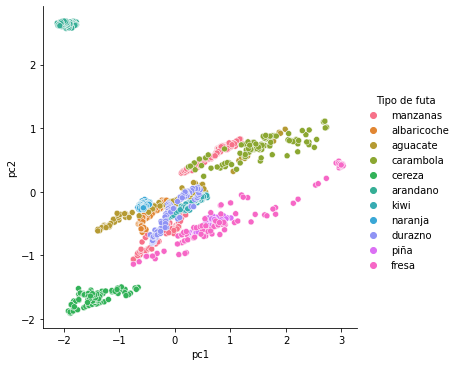

In [65]:
import seaborn as sns
sns.relplot(x='pc1', y='pc2', hue='Tipo de futa',data=proy_1)

### Realizamos el Kernel PCA con HSV

In [66]:
from sklearn.decomposition import KernelPCA
sigma = 10
ncomp = 1
# Kernel PCA con nuestros datos de entrenamiento
kpca = KernelPCA(n_components=2, kernel='rbf', gamma=1/sigma)
# Proyecto nuestros datos de prueba (el grid) en el componente principal 'ncomp'
mesh_kpca = kpca.fit_transform(estandar)
# ajusto las proyeccions para un grid
#Z = np.reshape(mesh_kpca[:,ncomp],(-1,num))

In [67]:
tabla_2 = pd.DataFrame(mesh_kpca)

In [68]:
tabla_2['Nombre'] = nombres_pca

In [69]:
tabla_2.columns = ['kpc1','kpc2','Tipo de futa']

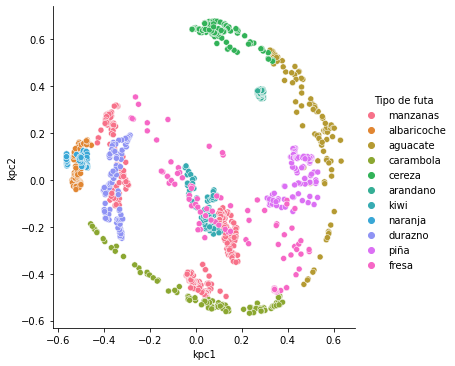

In [70]:
sns.relplot(x='kpc1', y='kpc2', hue='Tipo de futa',data=tabla_2)

# Inciso C

Debemos aplicar K-means y Kernel K-means pero ahora ocupamos datos HSV

In [133]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=11, init='random', n_init=10, max_iter=300, tol=1e-04, random_state=0)
#y_km = kmeans.fit_predict(datos_pca)
y_km = kmeans.fit_predict(datos_pca)

In [134]:
data_toy_km = pd.DataFrame(datos_pca).assign(cl_km = y_km)
data_toy_km

,0,1,2,cl_km
0,3,203,142,9
1,3,201,142,9
2,3,202,141,9
3,3,205,140,9
4,3,206,139,9
...,...,...,...,...
1295,2,186,131,9
1296,2,184,131,9
1297,2,185,131,9
1298,2,173,129,9


In [135]:
data_toy_km.mean()
data_toy_km.columns = ['x1','x2','x3','tipo']
data_toy_km

,x1,x2,x3,tipo
0,3,203,142,9
1,3,201,142,9
2,3,202,141,9
3,3,205,140,9
4,3,206,139,9
...,...,...,...,...
1295,2,186,131,9
1296,2,184,131,9
1297,2,185,131,9
1298,2,173,129,9


In [136]:
colores = ('g','r','b','k','m','violet','gray','y','brown','orange','pink')
grupos = ('1','2','3','4','5','6','7','8','9','10','11')
d = data_toy_km.iloc[:,0:3]
x = data_toy_km.iloc[:,0:1]
y = data_toy_km.iloc[:,1:2]
z = data_toy_km.iloc[:,2:3]

### Graficamos 

In [137]:
t = []
t2 = []
t3 = []
t4 = []
t5 = []
t6 = []
t7 = []
t8 = []
t9 = []
t10 = []
t11 = []
for r in range(1300):
    if(data_toy_km.iloc[r,3] == 1):
        t.append(data_toy_km.iloc[r,0:3])
    elif(data_toy_km.iloc[r,3] == 2):
        t2.append(data_toy_km.iloc[r,0:3])
    elif(data_toy_km.iloc[r,3] == 3):
        t3.append(data_toy_km.iloc[r,0:3])
    elif(data_toy_km.iloc[r,3] == 4):
        t4.append(data_toy_km.iloc[r,0:3])
    elif(data_toy_km.iloc[r,3] == 5):
        t5.append(data_toy_km.iloc[r,0:3])
    elif(data_toy_km.iloc[r,3] == 6):
        t6.append(data_toy_km.iloc[r,0:3])
    elif(data_toy_km.iloc[r,3] == 7):
        t7.append(data_toy_km.iloc[r,0:3])
    elif(data_toy_km.iloc[r,3] == 8):
        t8.append(data_toy_km.iloc[r,0:3])
    elif(data_toy_km.iloc[r,3] == 9):
        t9.append(data_toy_km.iloc[r,0:3])
    elif(data_toy_km.iloc[r,3] == 10):
        t10.append(data_toy_km.iloc[r,0:3])
    elif(data_toy_km.iloc[r,3] == 11):
        t11.append(data_toy_km.iloc[r,0:3])

In [138]:
t = pd.DataFrame(t)
t2 = pd.DataFrame(t2)
t3 = pd.DataFrame(t3)
t4 = pd.DataFrame(t4)
t5 = pd.DataFrame(t5)
t6 = pd.DataFrame(t6)
t7 = pd.DataFrame(t7)
t8 = pd.DataFrame(t8)
t9 = pd.DataFrame(t9)
t10 = pd.DataFrame(t10)
t11 = pd.DataFrame(t11)

<IPython.core.display.Javascript object>


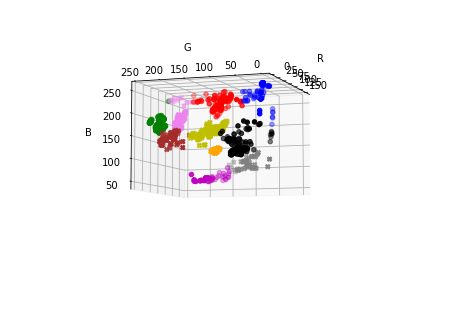

In [142]:
fig = plt.figure()
# Creamos el plano 3D
ax1 = fig.add_subplot(111, projection='3d')

# Agregamos los puntos en el plano 3D
ax1.scatter(t.iloc[:,0:1], t.iloc[:,1:2], t.iloc[:,2:3], c='g', marker='o')
ax1.scatter(t2.iloc[:,0:1], t2.iloc[:,1:2], t2.iloc[:,2:3], c ='r', marker='o')
ax1.scatter(t3.iloc[:,0:1], t3.iloc[:,1:2], t3.iloc[:,2:3], c ='b', marker='o')
ax1.scatter(t4.iloc[:,0:1], t4.iloc[:,1:2], t4.iloc[:,2:3], c ='k', marker='o')
ax1.scatter(t5.iloc[:,0:1], t5.iloc[:,1:2], t5.iloc[:,2:3], c ='m', marker='o')
ax1.scatter(t6.iloc[:,0:1], t6.iloc[:,1:2], t6.iloc[:,2:3], c ='violet', marker='X')
ax1.scatter(t7.iloc[:,0:1], t7.iloc[:,1:2], t7.iloc[:,2:3], c ='gray', marker='X')
ax1.scatter(t8.iloc[:,0:1], t8.iloc[:,1:2], t8.iloc[:,2:3], c ='y', marker='X')
ax1.scatter(t9.iloc[:,0:1], t9.iloc[:,1:2], t9.iloc[:,2:3], c ='brown', marker='X')
ax1.scatter(t10.iloc[:,0:1], t10.iloc[:,1:2], t10.iloc[:,2:3], c ='orange', marker='X')
ax1.scatter(t11.iloc[:,0:1], t11.iloc[:,1:2], t11.iloc[:,2:3], c ='pink', marker='X')
ax1.set_xlabel('R')
ax1.set_ylabel('G')
ax1.set_zlabel('B')
# Mostramos el gráfico
plt.show()

### Ahora ocupamos el Kernel k-means con datos HSV

In [79]:
ejercico3_HSV = pd.DataFrame(datos_pca)

En esta sección se ocupo como apoyo el lenguaje de programación para poder encontrar el kernek-kmeans, se anexa a continuación


    library("imager") # manipular imagenes
    library("plyr") # visualización 
    library("raster") # manipular imagenes
    library("gridExtra") # visualizar imagenes
    library("grid") # visualizar imagnes
    library("rgl") # manipular imagenes
    library("ggplot2") # visualizar imagenes
    library("plot3D") # visualizar 3d imagenes
    library("plot3Drgl") # visualizar 3d imagenes
    library("kernlab") # Kernel PCA y Kernel K-means
    library("tidyverse")
    ###########Lo realizamos con datos HSV
    datos3 <- read.csv("C:/Users/Marcelo Sanchez/Downloads/datos_ult.csv")
    #View(datos3)
    datos3[,2]
    datos3[,3]
    datos3[,4]

    df = data.frame(
      datos3[,2],
      datos3[,3],
      datos3[,4]
    )
    df <- df %>% as.matrix
    set.seed(0)
    K <- kkmeans(df, 11, kernel = "rbfdot",
             kpar = list(sigma=20),
             alg ="kkmeans") 
    df <- df %>% as.data.frame

    df$label <- K@.Data
    Tabla5 <- K@.Data %>% table
    View(Tabla5)


    write.csv(df, file="C:/Users/Marcelo Sanchez/Downloads/Tabla5d.csv")

In [80]:
ejercico3_HSV.to_csv('datos_ult.csv')

In [82]:
Tabla5 = pd.read_csv('Tabla5d.csv')
Tabla5 = Tabla5.iloc[:,1:]

In [83]:
############## Volvemos a separar nuestros datos para intentar graficar
##############OJO AQUI PENDEJO NO CORRAS ASI PORQUE SI 
data_toy_km = Tabla5
t = []
t2 = []
t3 = []
t4 = []
t5 = []
t6 = []
t7 = []
t8 = []
t9 = []
t10 = []
t11 = []
for r in range(1300):
    if(data_toy_km.iloc[r,3] == 1):
        t.append(data_toy_km.iloc[r,0:3])
    elif(data_toy_km.iloc[r,3] == 2):
        t2.append(data_toy_km.iloc[r,0:3])
    elif(data_toy_km.iloc[r,3] == 3):
        t3.append(data_toy_km.iloc[r,0:3])
    elif(data_toy_km.iloc[r,3] == 4):
        t4.append(data_toy_km.iloc[r,0:3])
    elif(data_toy_km.iloc[r,3] == 5):
        t5.append(data_toy_km.iloc[r,0:3])
    elif(data_toy_km.iloc[r,3] == 6):
        t6.append(data_toy_km.iloc[r,0:3])
    elif(data_toy_km.iloc[r,3] == 7):
        t7.append(data_toy_km.iloc[r,0:3])
    elif(data_toy_km.iloc[r,3] == 8):
        t8.append(data_toy_km.iloc[r,0:3])
    elif(data_toy_km.iloc[r,3] == 9):
        t9.append(data_toy_km.iloc[r,0:3])
    elif(data_toy_km.iloc[r,3] == 10):
        t10.append(data_toy_km.iloc[r,0:3])
    elif(data_toy_km.iloc[r,3] == 11):
        t11.append(data_toy_km.iloc[r,0:3])

In [84]:
t = pd.DataFrame(t)
t2 = pd.DataFrame(t2)
t3 = pd.DataFrame(t3)
t4 = pd.DataFrame(t4)
t5 = pd.DataFrame(t5)
t6 = pd.DataFrame(t6)
t7 = pd.DataFrame(t7)
t8 = pd.DataFrame(t8)
t9 = pd.DataFrame(t9)
t10 = pd.DataFrame(t10)
t11 = pd.DataFrame(t11)

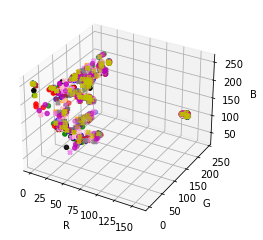

In [85]:
fig = plt.figure()
# Creamos el plano 3D
ax1 = fig.add_subplot(111, projection='3d')

# Agregamos los puntos en el plano 3D
ax1.scatter(t.iloc[:,0:1], t.iloc[:,1:2], t.iloc[:,2:3], c='g', marker='o')
ax1.scatter(t2.iloc[:,0:1], t2.iloc[:,1:2], t2.iloc[:,2:3], c ='r', marker='o')
ax1.scatter(t3.iloc[:,0:1], t3.iloc[:,1:2], t3.iloc[:,2:3], c ='b', marker='o')
ax1.scatter(t4.iloc[:,0:1], t4.iloc[:,1:2], t4.iloc[:,2:3], c ='k', marker='o')
ax1.scatter(t5.iloc[:,0:1], t5.iloc[:,1:2], t5.iloc[:,2:3], c ='m', marker='o')
ax1.scatter(t6.iloc[:,0:1], t6.iloc[:,1:2], t6.iloc[:,2:3], c ='violet', marker='X')
ax1.scatter(t7.iloc[:,0:1], t7.iloc[:,1:2], t7.iloc[:,2:3], c ='gray', marker='X')
ax1.scatter(t8.iloc[:,0:1], t8.iloc[:,1:2], t8.iloc[:,2:3], c ='y', marker='X')
ax1.scatter(t9.iloc[:,0:1], t9.iloc[:,1:2], t9.iloc[:,2:3], c ='brown', marker='X')
ax1.scatter(t10.iloc[:,0:1], t10.iloc[:,1:2], t10.iloc[:,2:3], c ='orange', marker='X')
ax1.scatter(t11.iloc[:,0:1], t11.iloc[:,1:2], t11.iloc[:,2:3], c ='pink', marker='X')
ax1.set_xlabel('R')
ax1.set_ylabel('G')
ax1.set_zlabel('B')
# Mostramos el gráfico
plt.show()

Ahora volvemos a ocupar nuestros datos pero los modificamos a un nuevo espacio HSV, debemos realizar una conversión de dichos valores.